In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rasterio as rst
from rasterio.mask import mask
import geopandas as gpd

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\jales\AppData\Local\Temp\ipykernel_6996\3816847921.py:6: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [4]:
rvi_f = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/RVI/florestal_RVI_reindex.csv')
rvi_s = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/RVI/savanica_RVI_reindex.csv')
rvi_c = pd.read_csv('D:/thesis_data/VEG_INDICES/stats/RVI/campestre_RVI_reindex.csv')

In [5]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [6]:
month_season_detector(rvi_f)
month_season_detector(rvi_s)
month_season_detector(rvi_c)

In [7]:
rain = pd.read_csv('D:/thesis_data/pluviometric_data/pluviometric_data_PNB_paper_01.csv', sep=',')

month_season_detector(rain)

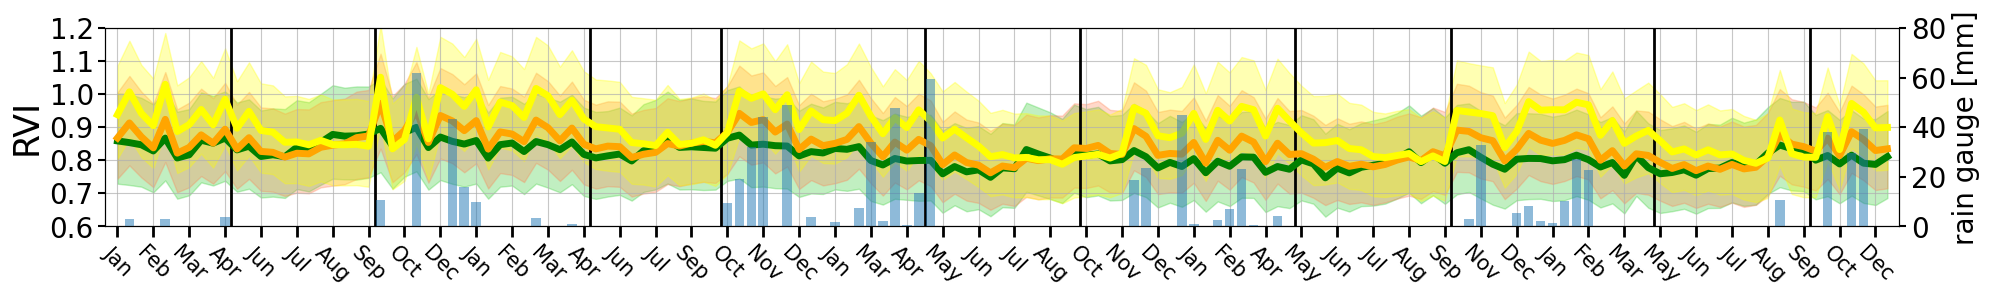

In [18]:
label_size = 20

x = rvi_f.index

y_f = rvi_f
y_s = rvi_s
y_c = rvi_c

fig, ax = plt.subplots(figsize=(20,3))

ax.vlines(x[9] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, y_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, y_f['percentile_25'], y_f['percentile_75'], alpha=0.3, color='limegreen')

ax.plot(x, y_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, y_s['percentile_25'], y_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, y_c['median'], 'yellow', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, y_c['percentile_25'], y_c['percentile_75'], alpha=0.3, color='yellow')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=y_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0.6, 1.2])
ax.set_xlim([-1, 149])
ax.set_ylabel('RVI', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.5)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=6)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/rvi_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

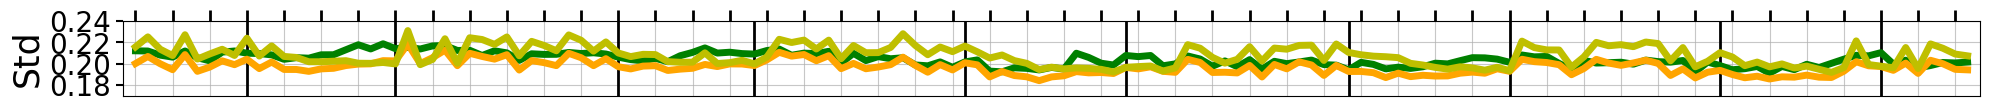

In [16]:
label_size = 20

x = rvi_f.index

y_f = rvi_f
y_s = rvi_s
y_c = rvi_c

fig, ax = plt.subplots(figsize=(20,1.2))

ax.vlines(x[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, y_f['std'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.plot(x, y_s['std'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.plot(x, y_c['std'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')

ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=rvi_f['mes'], fontdict={'fontsize': 20, 'rotation': -60})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0.17, 0.24])
ax.set_xlim([-1, 149])
ax.set_ylabel('Std', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=4)
ax.grid(True, alpha=0.7)

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/rvi_std.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [9]:
water = gpd.read_file('D:/thesis_data/ROI/classes/agua_10m_32723.geojson')
water = [geom for geom in water.geometry]

with rst.open('D:/thesis_data/VEG_INDICES/raster/20210714T084516.tif') as raster:
    image, _ = mask(raster, water, invert=True, nodata=np.nan)

    rvi = image[4]

# 20210714T084530.tif

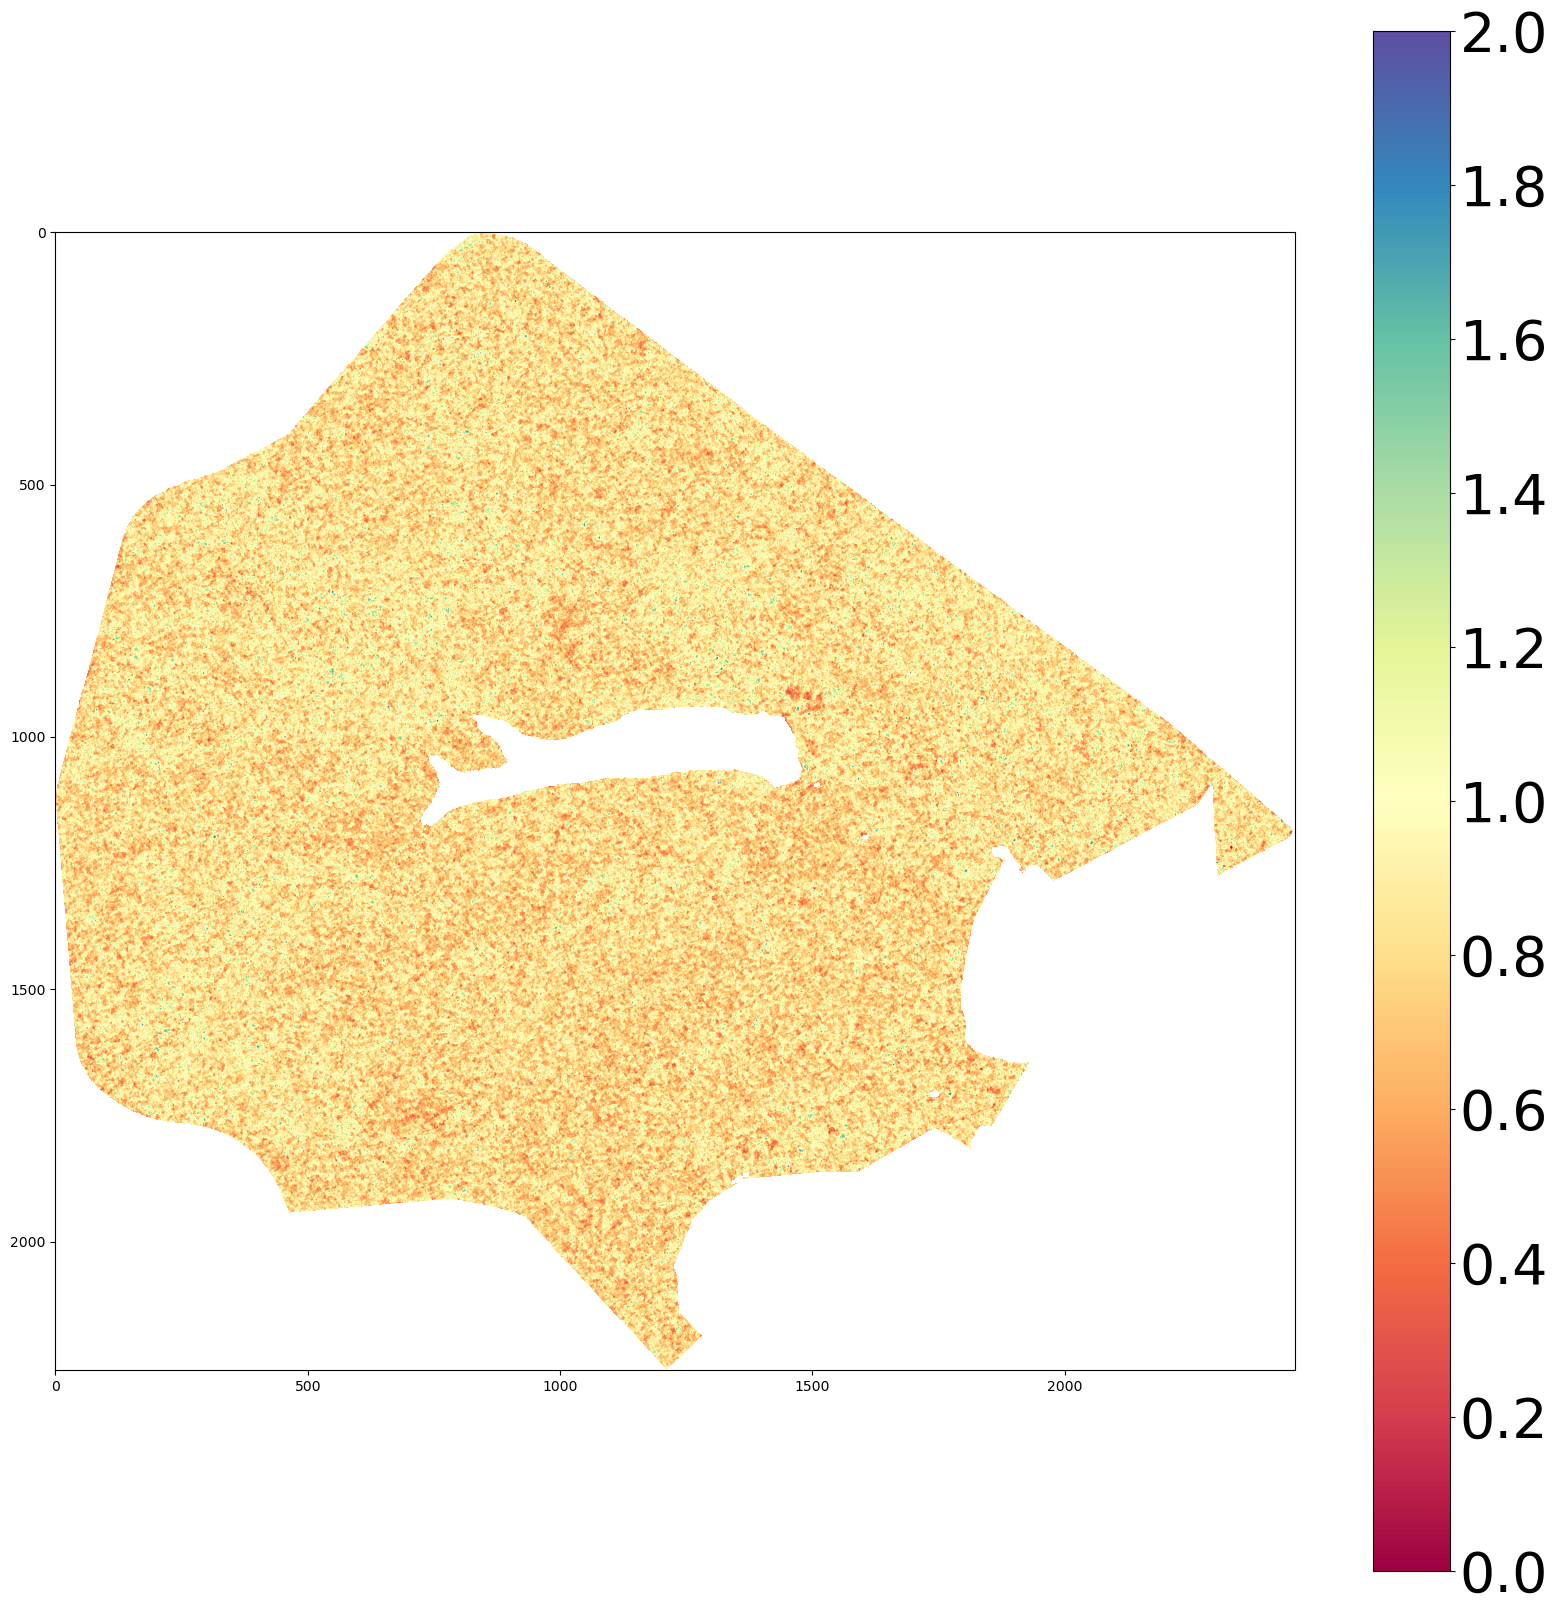

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(rvi, cmap='Spectral', vmin=0, vmax=2)

norm = Normalize(vmin=0, vmax=2)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='Spectral'), ax=ax, location='right')
cbar.ax.tick_params(labelsize=40)
cbar.ax.locator_params(axis='y', nbins=10)

plt.savefig('C:/Users/jales/Desktop/rvi_dry.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [11]:
import matplotlib.pyplot as plt
import rioxarray as rxr 
from shapely.geometry import mapping
import geopandas as gpd

In [12]:
# Open vector layer
florestal_path = 'D:/thesis_data/ROI/classes/form_florestal_30m_32723_buffer.geojson'
savanica_path = 'D:/thesis_data/ROI/classes/form_savanica_30m_32723_buffer.geojson'
campestre_path = 'D:/thesis_data/ROI/classes/form_campestre_30m_32723_buffer.geojson'

In [13]:
# Clip raster para cada classe vectorial de interesse
crop_savanica = gpd.read_file(savanica_path)
crop_campestre = gpd.read_file(campestre_path)
crop_florestal = gpd.read_file(florestal_path)

In [15]:
raster = rxr.open_rasterio('D:/thesis_data/VEG_INDICES/raster/20210714T084516.tif', masked=True)
rvi = raster.sel(band=5) # Seleção da banda

# 20201222T084517.tif

In [16]:
florestal_rvi = rvi.rio.clip(crop_florestal.geometry.apply(mapping))
savanica_rvi = rvi.rio.clip(crop_savanica.geometry.apply(mapping))
campestre_rvi = rvi.rio.clip(crop_campestre.geometry.apply(mapping))

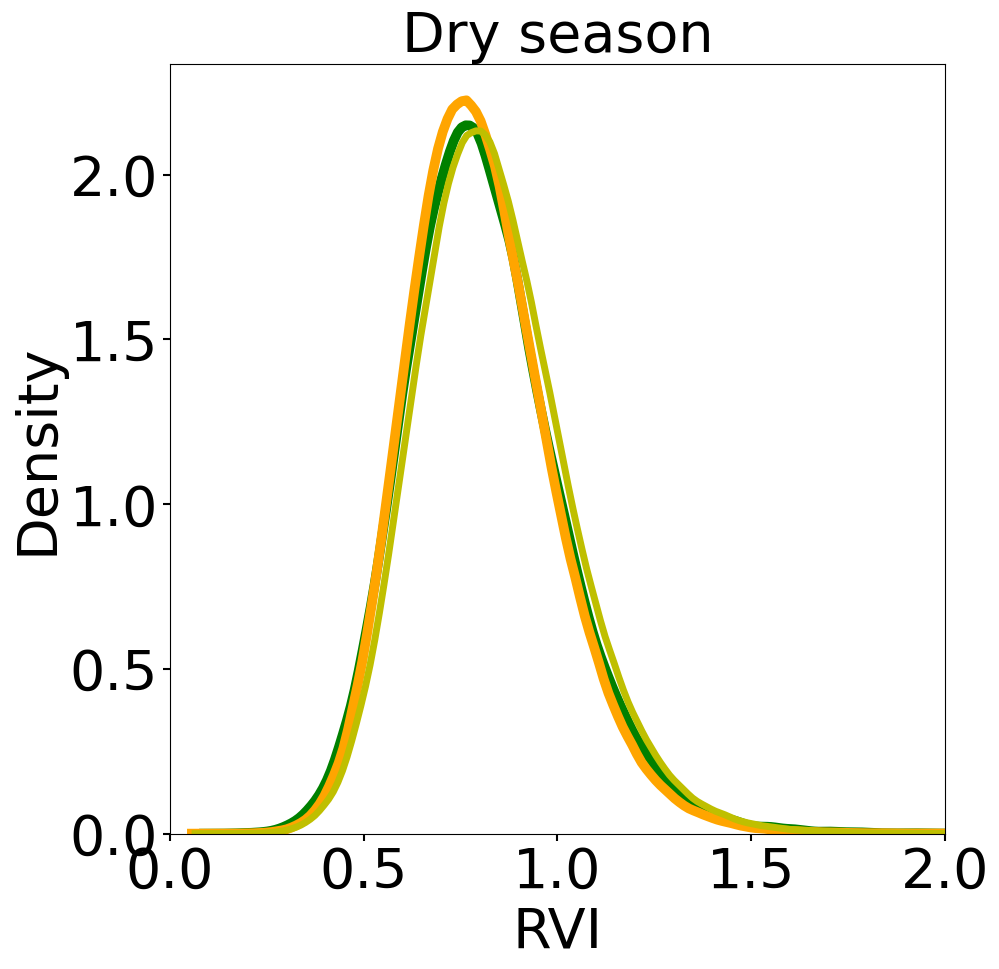

In [17]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

bins=1000

sns.distplot(florestal_rvi, bins=bins, hist=False, color='green', kde_kws={'linewidth': 7}, label='Forest')
sns.distplot(savanica_rvi, bins=bins, hist=False, color='orange', kde_kws={'linewidth': 7}, label='Savanna')
sns.distplot(campestre_rvi, bins=bins, hist=False, color='y', kde_kws={'linewidth': 5}, label='Grassland')

ax.set_title('Dry season', fontdict={'fontsize':40})
ax.set_ylabel('Density', fontsize=40)
ax.set_xlim([0, 2])
#ax.set_ylim([0, 1.8])
ax.set_xlabel('RVI', fontsize=40)
ax.tick_params(axis='y', length=5, width=1.5, labelsize=40)
ax.tick_params(axis='x', length=5, width=1.5, labelsize=40)

#fig.legend(fontsize=25, loc='upper right')

plt.savefig('C:/Users/jales/Desktop/rvi_dists_dry.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)